unzipping the dataset


In [ ]:
!unzip /content/Dataset.zip

unzip:  cannot find or open /content/Dataset.zip, /content/Dataset.zip.zip or /content/Dataset.zip.ZIP.


In [ ]:
!rm -rf /content/dataset
!mkdir /content/drive
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [ ]:
import os

def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")

    # Get a list of all entries in the directory
    all_entries = os.listdir(directory_path)

    # Filter out only directories
    folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]

    return folders

In [ ]:
DIRECTORY = r"//kaggle/input/fish-disease/Fish Disease Dataset"
CATAGORIES = []

try:
    # Attempt to find all the subdirectories (classes) in the provided directory
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}': {folders}")

    # Append each folder (class name) to CATAGORIES
    for folder in folders:
        CATAGORIES.append(folder)

except ValueError as e:
    print(e)

# Output the categories found
print("Categories:", CATAGORIES)


The directory '//kaggle/input/fish-disease/Fish Disease Dataset' does not exist.
Categories: []


In [ ]:
DIRECTORY= r"//kaggle/input/fish-disease/Fish Disease Dataset"
CATAGORIES= []
try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATAGORIES.append(folder)
except ValueError as e:
    print(e)

CATAGORIES


The directory '//kaggle/input/fish-disease/Fish Disease Dataset' does not exist.


[]

In [ ]:
for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    print(folder)
    label=CATAGORIES.index(categories)
    print(label)

In [ ]:
for label, category in enumerate(CATAGORIES):
    folder = os.path.join(DIRECTORY, category)
    print(f"Folder path: {folder}")
    print(f"Label: {label}")


In [ ]:

data=[]
image_size=128

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)


    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (image_size,image_size))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")

#         img_arr=cv2.resize(img_arr,(100,100))

#         data.append([img_arr,label])

In [ ]:

len(data)

0

In [ ]:
for i in range(len(data)):
    print(data[i][1])



In [ ]:
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

In [ ]:
X= np.array(x)
Y=np.array(y)

In [ ]:
X=X/255
print(X)
# X



[]


In [ ]:
print(X.shape)
print(Y.shape)


(0,)
(0,)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Define X and Y
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
Y = np.array([0, 0, 0, 1, 1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(4, 2)
(4,)


In [ ]:
print(X_test.shape)
print(y_test.shape)




(1, 2)
(1,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

x = np.array(x)

# Reshape array
x = x.reshape(-1, 1, 2, 1)

# Define the model
model = Sequential()
model.add(Conv2D(64, (1, 1), input_shape=x.shape[1:], activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (1, 1), input_shape=x.shape[1:], activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (1, 1), input_shape=x.shape[1:], activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1, 2, 64)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 0, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 0, 1, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 0, 0, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 0, 0, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 0, 0, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,450 (33.01 KB)

 Trainable params: 8,450 (33.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
# Reshape input data
X_train = X_train.reshape(-1, 2)
y_train = y_train.reshape(-1, 1)

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(2,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
no_of_epochs = 50
model_history = model.fit(X_train, y_train, epochs=no_of_epochs, validation_split=0.15)





Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 0.6994 - val_accuracy: 0.0000e+00 - val_loss: 0.7555
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step - accuracy: 0.6667 - loss: 0.6602 - val_accuracy: 1.0000 - val_loss: 0.6053
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6667 - loss: 0.6395 - val_accuracy: 1.0000 - val_loss: 0.5043
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.6667 - loss: 0.6325 - val_accuracy: 1.0000 - val_loss: 0.4453
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.6667 - loss: 0.6344 - val_accuracy: 1.0000 - val_loss: 0.4202
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.6667 - loss: 0.6337 - val_accuracy: 1.0000 - val_loss: 0.4193
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.6667 - loss: 0.6294 - val_accuracy: 1.0000 - val_loss: 0.4358
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.6667 - loss: 0.6228 - val_accuracy: 1.0000 - val_loss: 0.4651
Ep

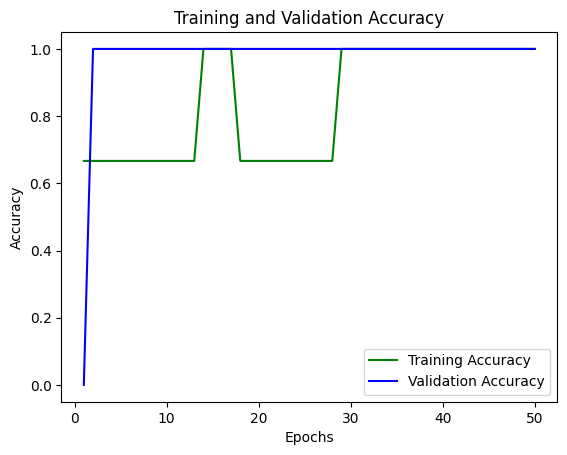

In [ ]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoachs = range(1,no_of_epochs+1)
plt.plot(epoachs,train_acc,'g',label='Training Accuracy')
plt.plot(epoachs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()




In [ ]:
model.save('NTD_1.h5')

In [ ]:
import os
import random

def find_random_files(folder_path, num_files=5):
    # Get a list of all files in the folder
    all_entries = os.listdir(folder_path)

    # Filter out only the files (ignoring directories)
    files = [f for f in all_entries if os.path.isfile(os.path.join(folder_path, f))]

    # Check if there are enough files to select from
    if len(files) < num_files:
        raise ValueError(f"The folder contains fewer than {num_files} files.")

    # Select a random sample of files
    selected_files = random.sample(files, num_files)

    return selected_files


In [ ]:
test_DIRECTORY= r"/kaggle/input/fish-disease/Fish Disease Dataset"

for categories in CATAGORIES:
    folder_path=os.path.join(test_DIRECTORY,categories)
    original_label=CATAGORIES.index(categories)
    try:
        random_files = find_random_files(folder_path, 5)
        print("Randomly selected files from class: ",categories )
        for file in random_files:
            img_path=os.path.join(folder_path,file)
#             print(img_path)
            img_pred=image.load_img(img_path,target_size=(image_size,image_size))

            img_pred=image.img_to_array(img_pred)
            img_pred=np.expand_dims(img_pred, axis=0)


            rslt= model.predict(img_pred)
            print("******************")
            print(f"Original Class {categories}")
            print(rslt)
            print(f"Predicted Class {CATAGORIES[np.argmax(rslt)]}")
#             print(CATAGORIES[np.argmax(rslt)])

    except ValueError as e:
        print(e)

In [ ]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


In [ ]:
y_pred

array([0])

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report')
cr = classification_report(y_true=y_test, y_pred=y_pred)

print(cr)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[1]])

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the labels
y_pred = model.predict(X_test)

# Convert the predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_class)

print(f'Accuracy: {accuracy:.3f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Accuracy: 1.000


ValueError: File format not supported: filepath=/content/from keras.models import load_model.html. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/content/from keras.models import load_model.html, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
!pip show tensorflow



Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
!pip install tensorflow==2.6.0


ERROR: Could not find a version that satisfies the requirement tensorflow==2.6.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.6.0


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
!unzip "/content/keras_model.h5"

Archive:  /content/keras_model.h5
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/keras_model.h5 or
        /content/keras_model.h5.zip, and cannot find /content/keras_model.h5.ZIP, period.


In [ ]:
import gradio
print(gradio.__version__)


5.8.0


In [ ]:
import gradio as gr
from tensorflow.keras.utils import img_to_array, load_img
from keras.models import load_model
import numpy as np

# Load the pre-trained model
model_path = '/content/keras_model.h5'
model = load_model(model_path)

# Define labels with respective pesticide information
disease_info = {
    'Bacterial disease-Aeromoniasis': {
        'title': "Bacterial Disease-Aeromoniasis",
        'pesticides': [
            "Potassium Permanganate", "Chlorine Compounds", "Formalin",
            "Hydrogen Peroxide", "Quaternary Ammonium Compounds"
        ]
    },
    'Bacterial Red disease': {
        'title': "Bacterial Red Disease",
        'pesticides': [
            "Potassium Permanganate", "Formalin", "Chloramine-T",
            "Hydrogen Peroxide", "Quaternary Ammonium Compounds", "Iodine-Based Disinfectants"
        ]
    },

    'Parasitic disease': {
        'title': "Parasitic Disease",
        'pesticides': [
            "Formalin", "Potassium Permanganate", "Copper Sulfate",
            "Sodium Chloride", "Hydrogen Peroxide"
        ]
    },
    'viral disease white tail disease': {
        'title': "Viral Disease White Tail Disease",
        'pesticides': [
            "Lime (Calcium Oxide or Calcium Hydroxide)", "Potassium Permanganate",
            "Chlorine Compounds", "Iodophor Compounds", "Formalin (Formaldehyde Solution)"
        ]
    },
    'Healthy fish': {
        'title': "Healthy Fish",
        'pesticides': None
    }
}

# Prediction function
def predict_disease(image_file):
    try:
        # Load and preprocess the image
        img = load_img(image_file, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Model prediction
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        label = list(disease_info.keys())[predicted_class]
        info = disease_info[label]

        # Generate HTML output
        if info['pesticides']:
            pesticides = ''.join([f"<li>{p}</li>" for p in info['pesticides']])
            result = f"""
            <h3 style="text-align:center; color:blue;">{info['title']}</h3>
            <h4>Pesticides to be used:</h4>
            <ul>{pesticides}</ul>
            <p style="text-align:center; color:red;"><b>Important Note:</b> Follow local regulations and guidelines.</p>
            """
        else:
            result = f"""
            <h3 style="text-align:center; color:green;">{info['title']}</h3>
            <p style="text-align:center;">No pesticides are required. The fish is healthy!</p>
            """
        return result

    except Exception as e:
        return f"<p style='color:red;'>Error: {str(e)}</p>"

# Gradio Interface
gr_interface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(type="filepath"),
    outputs="html",
    title="Fish Disease Detection and Diagnosis",
    description="Upload an image of a fish to detect disease and receive treatment suggestions.",
)

# Launch the app
gr_interface.launch()
